In [1]:
from cifar10_import import *
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
# Import CIFAR-10 Dataset
x_images, y_labels = importCifar10("combined")

<BarContainer object of 10 artists>

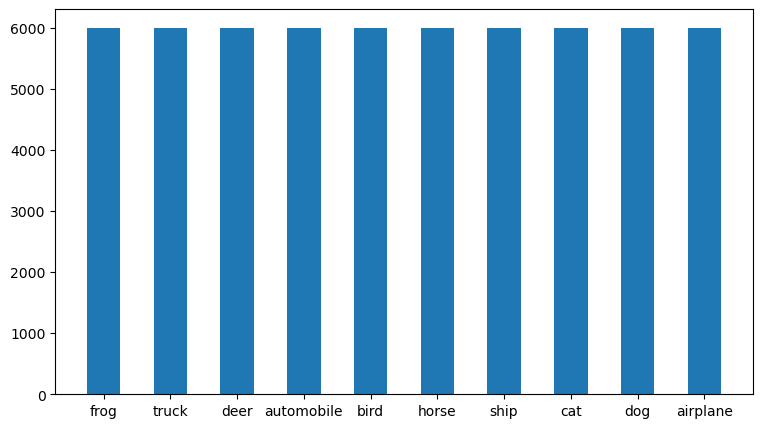

In [3]:
# See distribution of images
y_distribution = defaultdict(int)
for y in y_labels:
    y_distribution[class_names[y]]+=1

names = list(y_distribution.keys())
values = list(y_distribution.values())

fig = plt.figure(figsize=(9,5))
plt.bar(names,values,width=0.5)

In [4]:
# Creating the training and testing sets (training is 60% of total)
X_train, X_test, y_train, y_test = train_test_split(x_images,y_labels,test_size=0.6,stratify=y_labels,shuffle=True)

# Create Validation Set (50% of test set)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,stratify=y_test,shuffle=True)

In [5]:
X_train_gray, X_val_gray, X_test_gray = grayScaleData(X_train, X_val, X_test)

To-Do:
- 10 kNN classifiers (one for each class, binary) vs 1 big kNN classifier
    - Which one is better?
- Optimal k value
- Confusion Matrix (Precision vs Recall)
- Grayscale vs Colored
- Background vs No Background?
- Partitioning
- Cross Validation
- Learning Curves
- Dimensionality Loss
- What it means in Context

In [7]:
"""
Creates a kNN model with n_neighbors = k and conducts c-folds cross validation
"""
def cross_validate_kNN(k: int, X, y:np.array, c: int, scoring = ['accuracy']):
    kNN = KNeighborsClassifier(n_neighbors=k)
    if scoring == None:
        return cross_validate(
            kNN,
            X, y,
            cv = c # It will use StratifiedKFolds to partition the data so not worry?
        )
    else:
        return cross_validate(
            kNN,
            X, y,
            cv = c,
            scoring = scoring
        )

In [8]:
X_scaled = prepareX(x_images)

In [11]:
print(cross_validate_kNN(5,X_scaled,y_labels,5)["test_accuracy"])

[0.33533333 0.33775    0.34316667 0.33416667 0.342     ]


In [8]:
def plotErrorRate(x_train,x_test,y_train,y_test):
    figure, axes = plt.subplots(1, figsize=(6, 6))

    k = [1, 2, 5, 10]
    valid_error_y =  list()
    train_error_y = list()
    for i in k:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_train,y_train)
        print(f"-- Created kNN for k = {i}")
        y_pred = neigh.predict(x_train)
        train_error_y.append(1 - accuracy_score(y_train,y_pred))
        y_pred = neigh.predict(x_test)
        valid_error_y.append(1 - accuracy_score(y_test,y_pred))
        print(f"-- Calculated Accuracy for k = {i}")

    axes.semilogx(k,train_error_y, color = "red", label = "Training Error")
    axes.semilogx(k,valid_error_y, color = "green", label = "Testing Error")
    axes.set_xlabel('k', fontsize=10)
    axes.set_ylabel('Error Rate', fontsize=10)
    axes.set_title("Error Rates vs k")
    axes.legend()

In [9]:
def computeClassAcc(c,model, x_train, x_test, y_train, y_test):
    y_train_c = [1 if c == class_names[y] else 0 for y in y_train]
    y_test_c = [1 if c == class_names[y] else 0 for y in y_test]
    model.fit(x_train,y_train_c)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test_c,y_pred)

def normalizeX(scaled = True, ):
    temp_x_train = X_train.flatten().reshape(len(X_train), 3072)
    temp_x_test = X_test.flatten().reshape(len(X_test), 3072)
    temp_x_train_gray = X_train_gray.flatten().reshape(len(X_train_gray), 1024)
    temp_x_test_gray = X_test_gray.flatten().reshape(len(X_test_gray), 1024)
    
    if scaled == True:
        scalar = StandardScaler()
        scalar_gray = StandardScaler()
        temp_x_train = scalar.fit_transform(temp_x_train)
        temp_x_test = scalar.transform(temp_x_test)
        temp_x_train_gray = scalar_gray.fit_transform(temp_x_train_gray)
        temp_x_test_gray = scalar_gray.transform(temp_x_test_gray)
        print("--Scaled training & test sets")
    
    return temp_x_train,temp_x_test,temp_x_train_gray,temp_x_test_gray

In [9]:
temp_x_train,temp_x_test = prepareX(X_train,X_test)
temp_x_train_gray,temp_x_test_gray = prepareX(X_train_gray,X_test_gray,gray_scale=True)

-- Created kNN for k = 1
-- Calculated Accuracy for k = 1
-- Created kNN for k = 2
-- Calculated Accuracy for k = 2
-- Created kNN for k = 5
-- Calculated Accuracy for k = 5
-- Created kNN for k = 10
-- Calculated Accuracy for k = 10


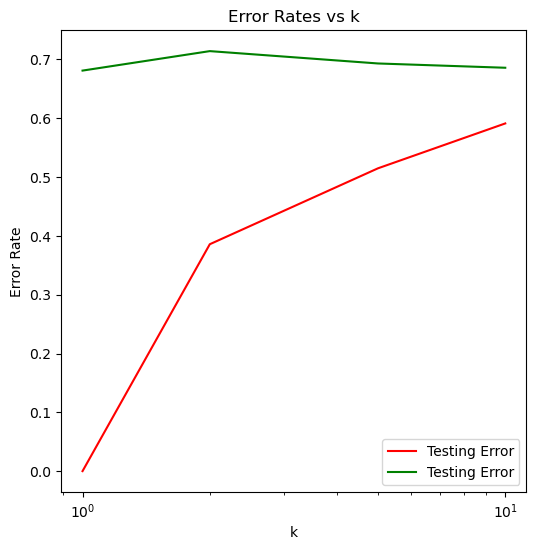

In [11]:
plotErrorRate(temp_x_train,temp_x_test,y_train,y_test)

-- Created kNN for k = 1
-- Calculated Accuracy for k = 1
-- Created kNN for k = 2
-- Calculated Accuracy for k = 2
-- Created kNN for k = 5
-- Calculated Accuracy for k = 5
-- Created kNN for k = 10
-- Calculated Accuracy for k = 10


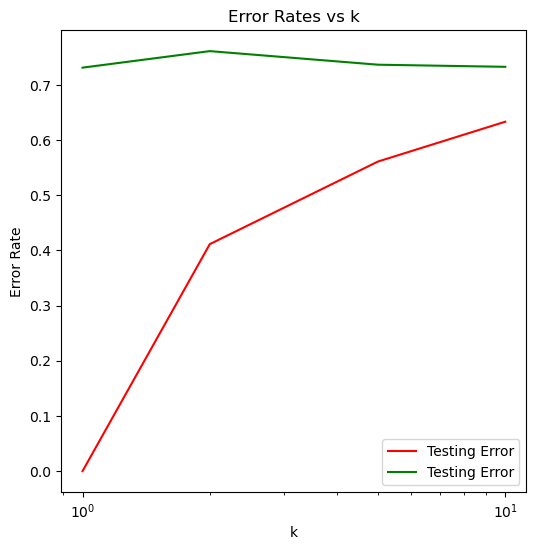

In [12]:
plotErrorRate(temp_x_train_gray,temp_x_test_gray,y_train,y_test) # Runs way faster than colored (less than half)

In [14]:
def computeAccuracy(x_train,x_test,y_train,y_test, k = 5):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)

    print(f"Accuracy for kNN: {accuracy_score(y_test,y_pred)}")

    # Evaluate confusion matrix using your function compute_confusion_matrix
    sklearn_cm = confusion_matrix(y_test, y_pred)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm,display_labels=class_names)
    sklearn_disp.plot(xticks_rotation='vertical')

--Scaled training & test sets
Accuracy for Colored kNN: 0.32155555555555554


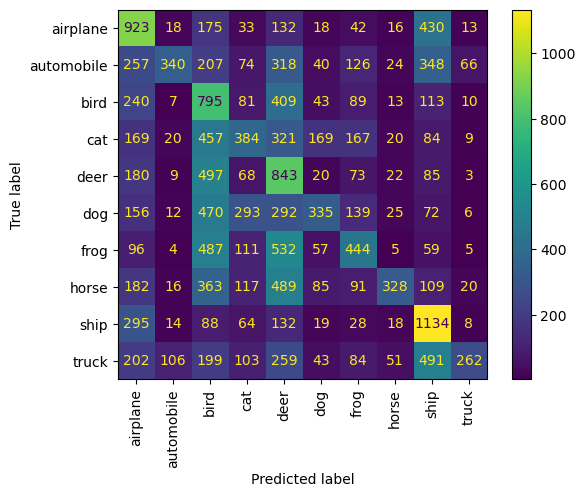

In [15]:
computeAccuracy(temp_x_train, temp_x_test, y_train, y_test)

In [10]:
# Essentially, in the training data, you have 9/10 images that aren't a class c
# temp_x_train, temp_x_test, temp_x_train_gray, temp_x_test_gray = normalizeX(True)
for c in class_names:
    knn_colored_binary = KNeighborsClassifier(n_neighbors=5)
    knn_grayscaled_binary = KNeighborsClassifier(n_neighbors=5)
    print(f"{c.capitalize()} (Colored: {'{:.2f}%'.format(computeClassAcc(c,knn_colored_binary,temp_x_train,temp_x_test,y_train,y_test)*100)}, Grayscale: {'{:.2f}%'.format(computeClassAcc(c,knn_grayscaled_binary,temp_x_train_gray,temp_x_test_gray,y_train,y_test)*100)})")

--Scaled training & test sets
Airplane (Colored: 91.41%, Grayscale: 88.07%)
